In [13]:
import struct 
import numpy as np
from matplotlib import pyplot as plt

import sllib


In [55]:
def unpack(frame):
    l = len(frame.packet)
    if frame.packetsize != l:
        print('packetsize:', frame.packetsize, len(frame.packet))
        return None
    temp = struct.unpack("i" * (frame.packetsize // 4), frame.packet)
    temp = np.array(temp)
    return temp

def read_echogram(input_file):
    with open(input_file, "rb") as f:
        reader = sllib.Reader(f)
        header = reader.header
        print(header)
        data = []
        for frame in reader:
            data.append(frame.to_dict())
            # the code to unpack the data packet
            temp = unpack(frame)
            if temp is None:
                continue
            try:
                echogram = np.vstack((echogram, temp))
            except NameError:
                echogram = temp
    echogram = echogram.T.astype("float32")
    return data, echogram

In [56]:
def test_overlay_wb_echo(filename):
    # Load sounding data and echogram.
    data, echo = read_echogram(filename)
    print("echogram read")
    
    ## Calculate sampling rate, using assumption that y-axis is in depth (ft)
    ## - not actually used in this function but given here as an illustration. 
    # time1 = np.array([i["time1"] for i in data])
    # dz = time1[1:] - time1[:-1]
    
    ## Calculate the water depth in y-axis samples
    wb = np.array([i["water_depth"] for i in data])
    lower_limit = np.array([i["lower_limit"] for i in data])
    wb_s =  wb * echo.shape[0] / lower_limit
    
    fig, axes = plt.subplots()
    axes.imshow(echo, aspect='auto')
    
    axes.plot([i["frame_index"] for i in data],
                 wb_s, linewidth=2, color="red")
    fig.show()

SlHeader(format=2, version=0, framesize=3200)>
echogram read


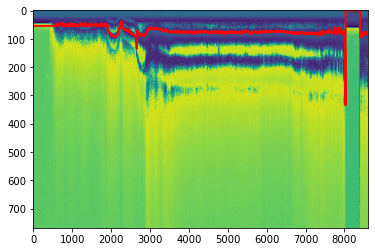

In [53]:
test_overlay_wb_echo('sample-data-lowrance/HDS5/southern1.sl2')

SlHeader(format=2, version=0, framesize=3200)>
packetsize: 3072 920
echogram read


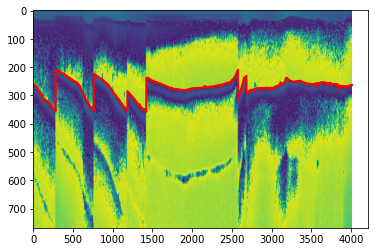

In [57]:
test_overlay_wb_echo('sample-data-lowrance/Elite_4_Chirp/small.sl2')